# Download and Extract the Dataset

In [ ]:
import os
import tarfile
import urllib.request

# Define the URL and the local file path
url = 'http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar'
file_path = 'indoorCVPR_09.tar'
extract_path = '.'  # Extracting to current directory

# Download the dataset
if not os.path.exists(file_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, file_path)
    print("Download complete.")

# Extract the dataset
if not os.path.exists('Images'):
    print("Extracting dataset...")
    with tarfile.open(file_path) as tar:
        tar.extractall(extract_path)
    print("Extraction complete.")


Download complete.
Extracting dataset...
Extraction complete.


# Load and Process the Dataset
It should be noted that the reason for different color intensity in the displayed images is Normalization.

Normalization by using transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) is crucial for the following reasons:
1.   Stability: It helps to stabilize the training process by ensuring that the input values have a consistent distribution. This can prevent issues like vanishing/exploding gradients.
2.   Faster Convergence: It can lead to faster convergence during training because the network doesn't have to adapt to varying scales of input data.
3.   Generalization: It helps the model to generalize better to new data.


The normalization values mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] are commonly used because they correspond to the mean and standard deviation of the ImageNet dataset, which is a large dataset of labeled images widely used for training image classification models.

Number of training samples: 10934
Number of validation samples: 3124
Number of test samples: 1562


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Shape of X [N, C, H, W]: torch.Size([100, 3, 128, 128])
Shape of y: torch.Size([100]) torch.int64


Classes: ['airport_inside', 'artstudio', 'auditorium', 'bakery', 'bar', 'bathroom', 'bedroom', 'bookstore', 'bowling', 'buffet', 'casino', 'children_room', 'church_inside', 'classroom', 'cloister', 'closet', 'clothingstore', 'computerroom', 'concert_hall', 'corridor', 'deli', 'dentaloffice', 'dining_room', 'elevator', 'fastfood_restaurant', 'florist', 'gameroom', 'garage', 'greenhouse', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_bus', 'inside_subway', 'jewelleryshop', 'kindergarden', 'kitchen', 'laboratorywet', 'laundromat', 'library', 'livingroom', 'lobby', 'locker_room', 'mall', 'meeting_room', 'movietheater', 'museum', 'nursery', 'office', 'operating_room', 'pantry', 'poolinside', 'prisoncell', 'restaurant', 'restaurant_kitchen', 'shoeshop', 'stairscase', 'studiomusic', 'subway', 'toystore', 'trainstation', 'tv_studio', 'videostore', 'waitingroom', 'warehouse', 'winecellar']
Number of Classes: 67
Label: airport_inside (Class No: 0)


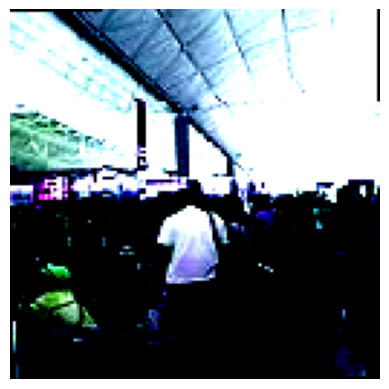

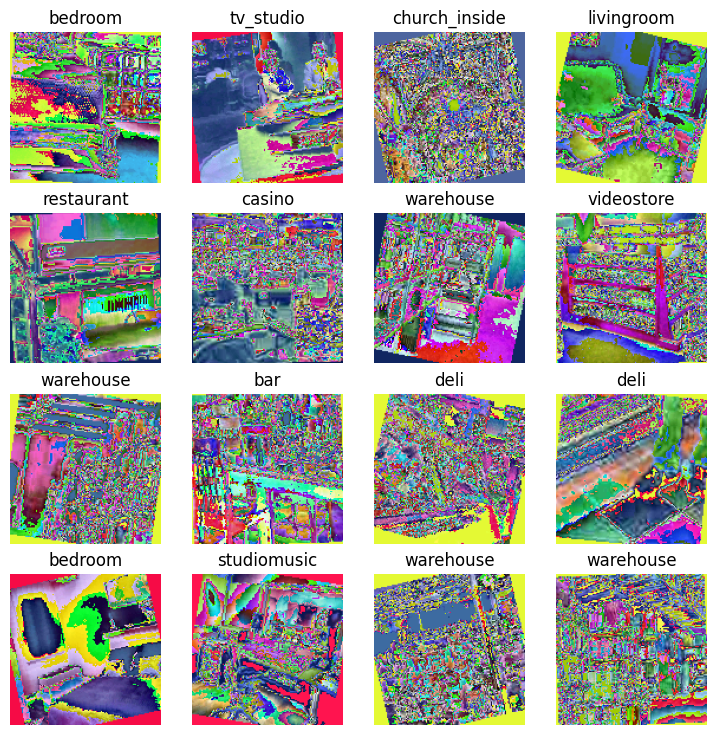

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

# Define the directory for the dataset
data_dir = 'Images'

# Define transformations with augmentation for increased dataset size
augmentation_transforms = transforms.Compose([
    transforms.RandomResizedCrop(128),  # Crop a random part of the image and resize to 128*128
    transforms.RandomHorizontalFlip(),   # Randomly flip the image horizontally
    transforms.RandomRotation(degrees=15),  # Randomly rotate the image by up to 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Adjust color
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
])

# Load the dataset with transformations
dataset = datasets.ImageFolder(data_dir, transform=augmentation_transforms)

# Split the dataset into training, validation, and test sets
dataset_len = len(dataset)
train_ds, val_ds, test_ds = random_split(dataset, [int(dataset_len * 0.7), int(dataset_len * 0.2), dataset_len - int(dataset_len * 0.9)])

# Create DataLoaders for each set; This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading.
batch_size = 100 #Parameter
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=4)

# Print some information about the dataset
print(f'Number of training samples: {len(train_ds)}')
print(f'Number of validation samples: {len(val_ds)}')
print(f'Number of test samples: {len(test_ds)}')
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
print(f'Classes: {dataset.classes}')
print(f'Number of Classes: {len(dataset.classes)}')

# Function to display an image and its label
def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

# Display a sample image from the dataset
img, label = dataset[5]
show_sample(img, label)

# Display a grid of 16 random images from the dataset
plt.figure(figsize=(9, 9))
indices = random.sample(range(len(dataset)), 16)
for i, idx in enumerate(indices):
    image, label = dataset[idx]
    ax = plt.subplot(4, 4, i + 1)
    image_np = image.permute(1, 2, 0).numpy()
    image_np = (image_np * 255).astype('uint8')
    plt.imshow(image_np)
    plt.title(dataset.classes[label])
    plt.axis('off')
plt.show()


# Examples of main color intensity with denormalize function.

Label: airport_inside (Class No: 0)


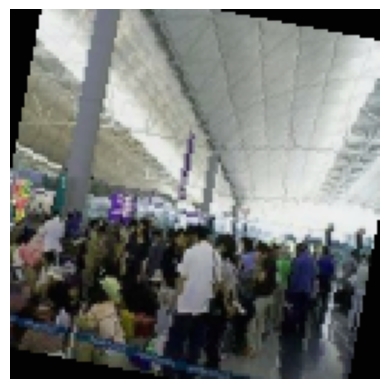

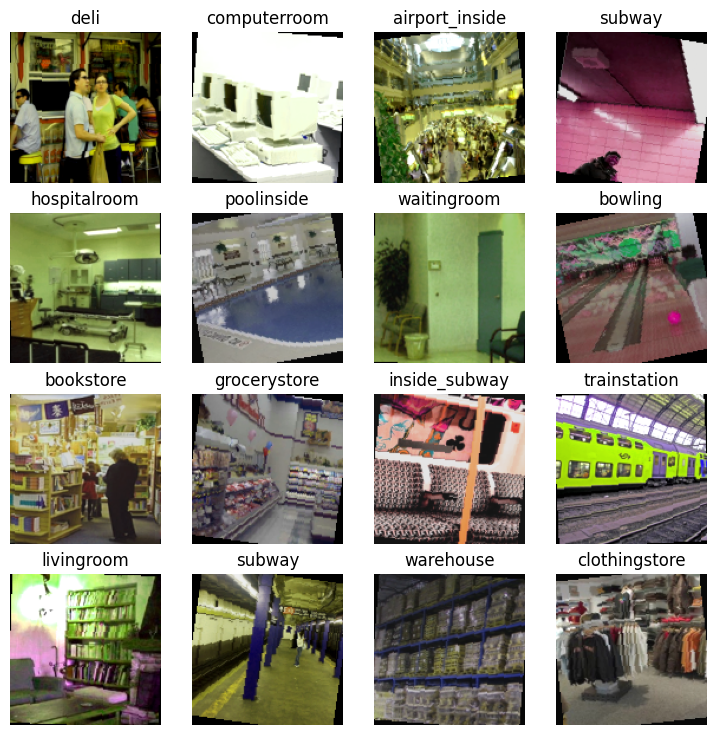

In [ ]:
# Function to denormalize the image
def denormalize(img_tensor):
    # Denormalize the image
    img_tensor = img_tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    img_tensor = img_tensor.clip(0, 1)  # Clip to ensure values are within [0, 1]
    return img_tensor

# Function to display an image and its label
def show_sample(img, label):
    img = denormalize(img)
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

# Display a sample image from the dataset
img, label = dataset[5]
show_sample(img, label)

# Display a grid of 16 random images from the dataset
plt.figure(figsize=(9, 9))
indices = random.sample(range(len(dataset)), 16)
for i, idx in enumerate(indices):
    image, label = dataset[idx]
    image = denormalize(image)
    ax = plt.subplot(4, 4, i + 1)
    image_np = image.permute(1, 2, 0).numpy()
    plt.imshow(image_np)
    plt.title(dataset.classes[label])
    plt.axis('off')
plt.show()

#  Class distributions

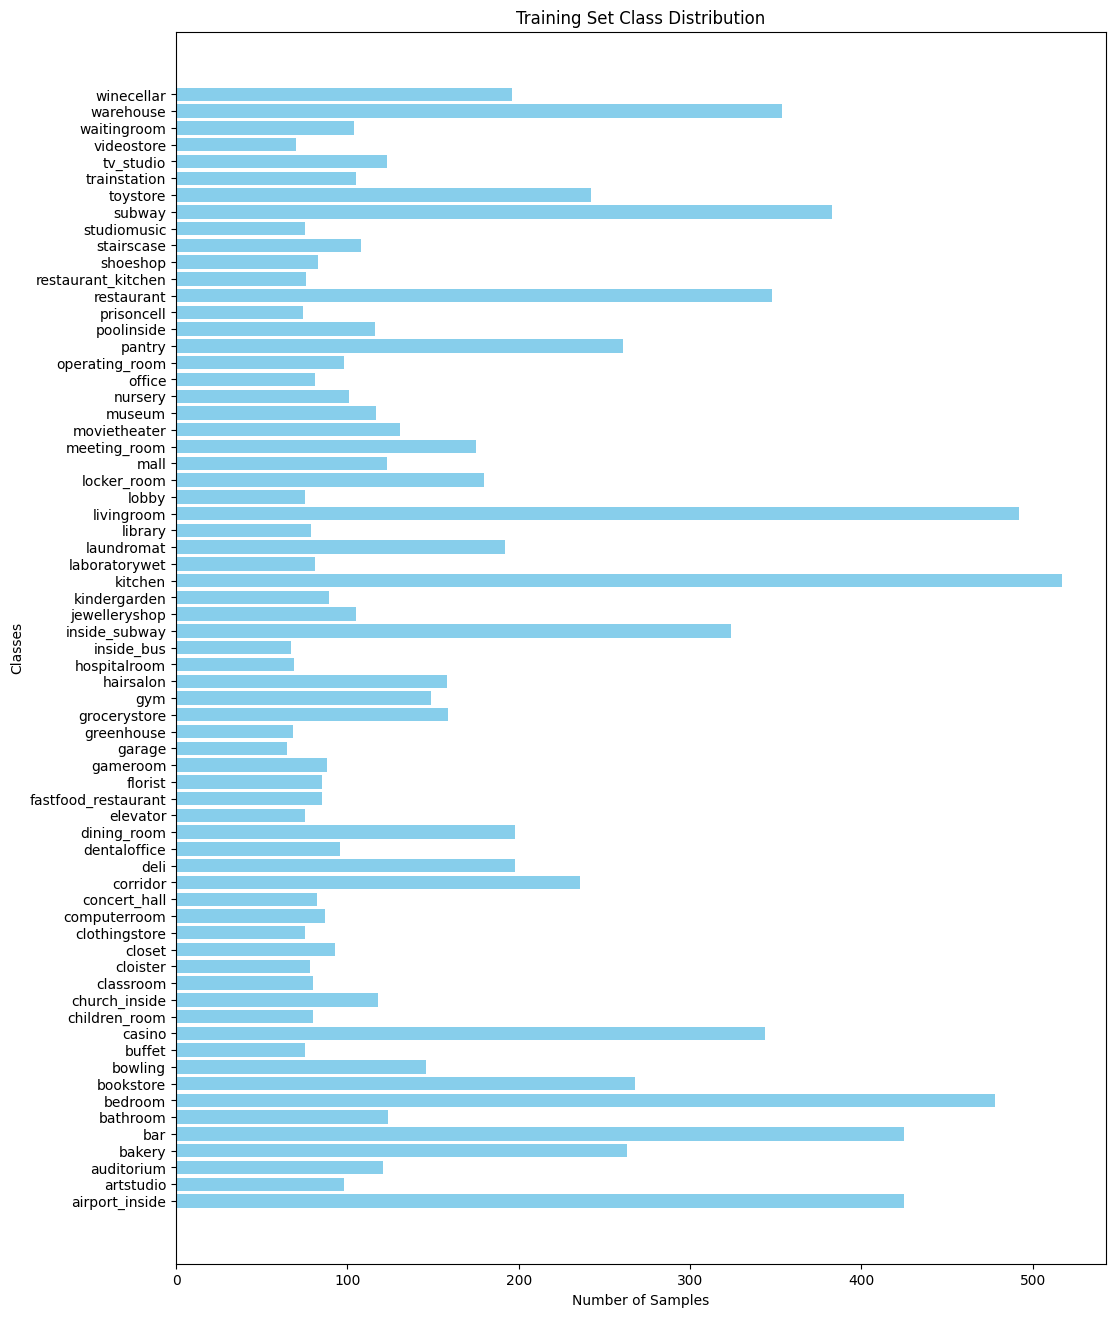

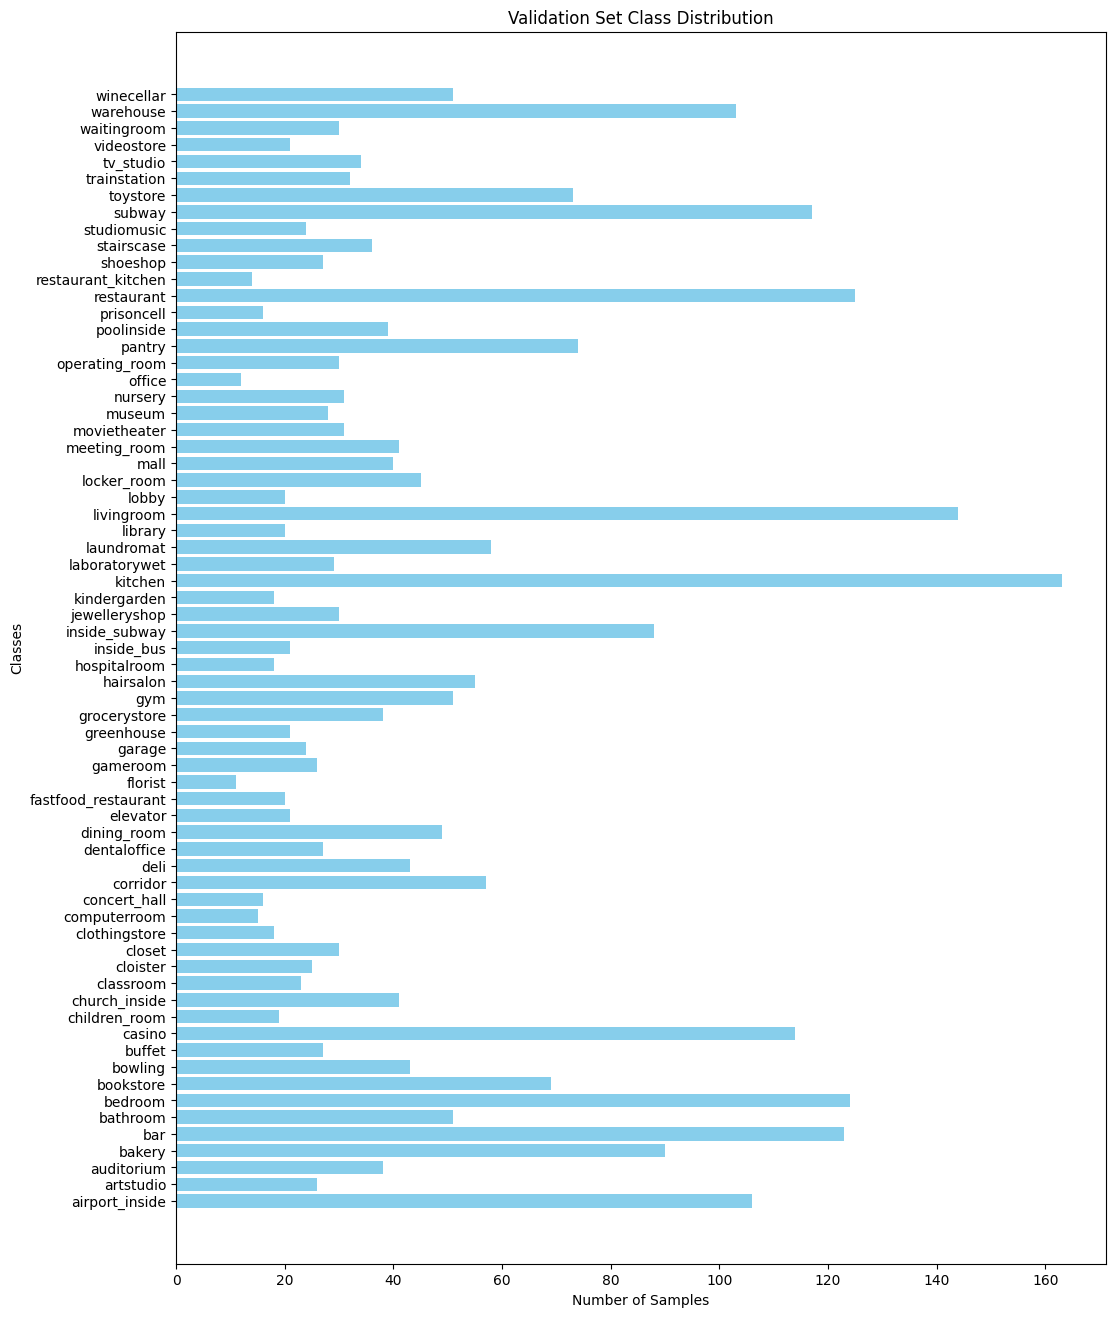

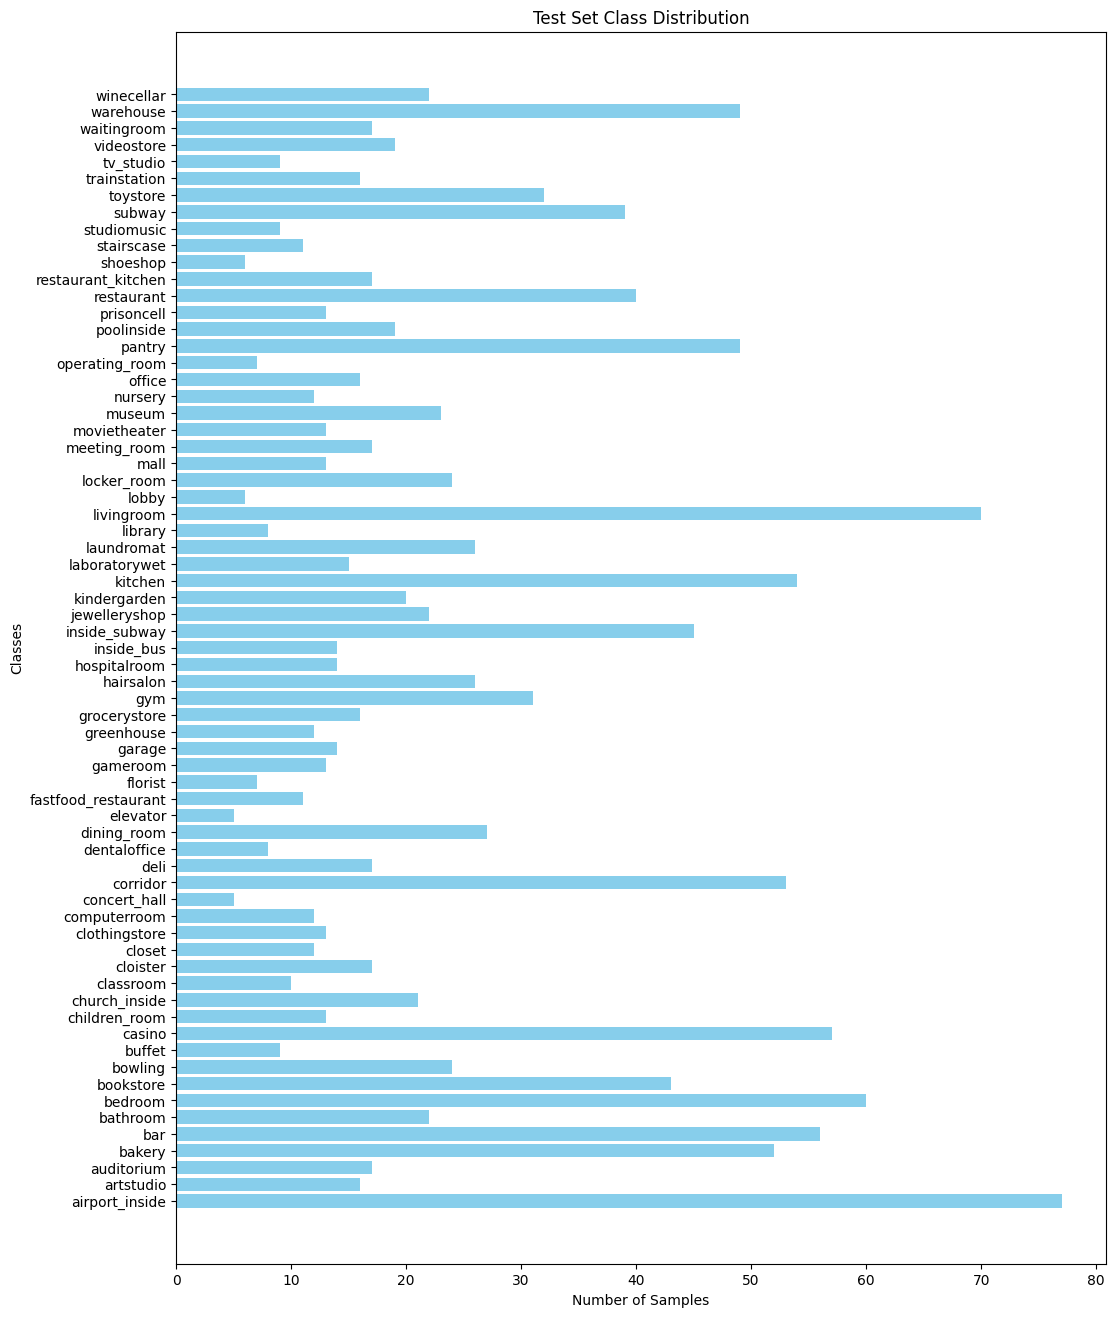

In [ ]:
from collections import Counter
import numpy as np
# Count the occurrences of each class in training, validation, and test datasets
def get_class_distribution(subset, dataset):
    count_dict = {k: 0 for k, v in dataset.class_to_idx.items()}
    for i in range(len(subset)):
        _, label = subset[i]
        count_dict[dataset.classes[label]] += 1
    return count_dict

train_class_distribution = get_class_distribution(train_ds, dataset)
val_class_distribution = get_class_distribution(val_ds, dataset)
test_class_distribution = get_class_distribution(test_ds, dataset)

# Plotting the class distributions
def plot_class_distribution(distribution, title):
    classes = list(distribution.keys())
    counts = list(distribution.values())

    plt.figure(figsize=(12, 16))
    plt.barh(classes, counts, color='skyblue')
    plt.xlabel('Number of Samples')
    plt.ylabel('Classes')
    plt.title(title)
    plt.show()

plot_class_distribution(train_class_distribution, 'Training Set Class Distribution')
plot_class_distribution(val_class_distribution, 'Validation Set Class Distribution')
plot_class_distribution(test_class_distribution, 'Test Set Class Distribution')

# Mapping 67 lables to 3 new lables
Categorizing the classes into broader categories to simplify the classification problem and make it more manageable.

1. Household Spaces:
'bathroom' 'bedroom' 'children_room' 'closet' 'corridor' 'dining_room' 'garage' 'kitchen' 'livingroom' 'pantry'

2. Transportation:
'airport_inside' 'inside_bus' 'inside_subway' 'subway' 'trainstation'

3. Public Spaces: 'computerroom' 'laundromat' 'bakery' 'bar' 'bookstore' 'buffet' 'casino' 'church_inside' 'cloister' 'clothingstore' 'deli' 'dentaloffice' 'elevator' 'fastfood_restaurant' 'florist' 'grocerystore' 'gym' 'hairsalon' 'hospitalroom' 'jewelleryshop' 'library' 'mall' 'operating_room' 'restaurant' 'restaurant_kitchen' 'shoeshop' 'stairscase' 'studiomusic' 'toystore' 'tv_studio' 'videostore' 'waitingroom' 'warehouse' 'winecellar' 'prisoncell' 'artstudio' 'bowling' 'concert_hall' 'gameroom' 'greenhouse' 'kindergarden' 'poolinside' 'movietheater' 'museum' 'nursery' 'classroom' 'laboratorywet' 'office' 'meeting_room' 'auditorium' 'locker_room' 'lobby'

Creating new training, validation, and test datasets with the three new categories by mapping the original dataset labels to the new category labels.

Number of training samples: 10934
Number of validation samples: 3124
Number of test samples: 1562


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Shape of X [N, C, H, W]: torch.Size([100, 3, 128, 128])
Shape of y: torch.Size([100]) torch.int64
New Classes: ['Household Spaces', 'Transportation', 'Public Spaces']
Number of New Classes: 3
Label: Transportation (Class No: 1)


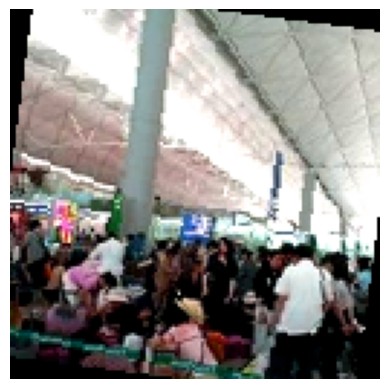

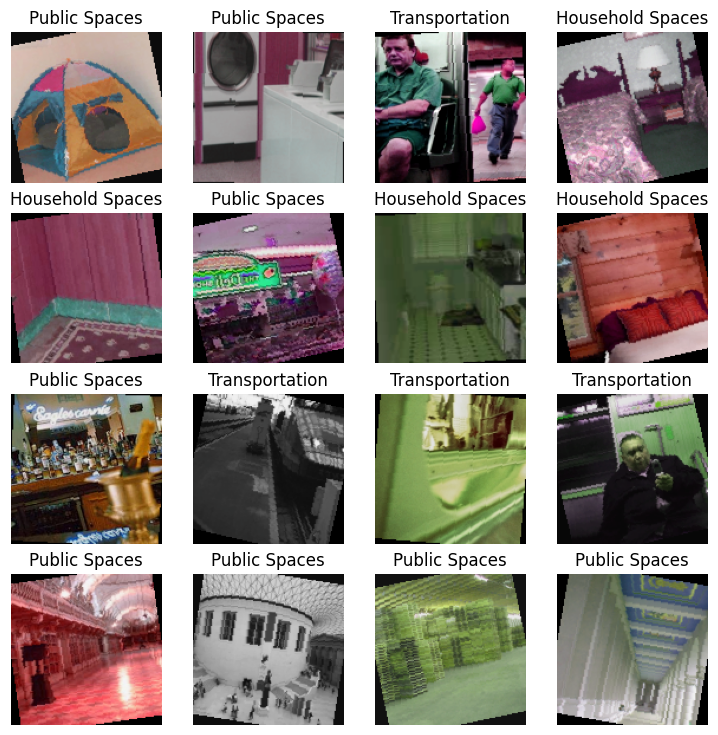

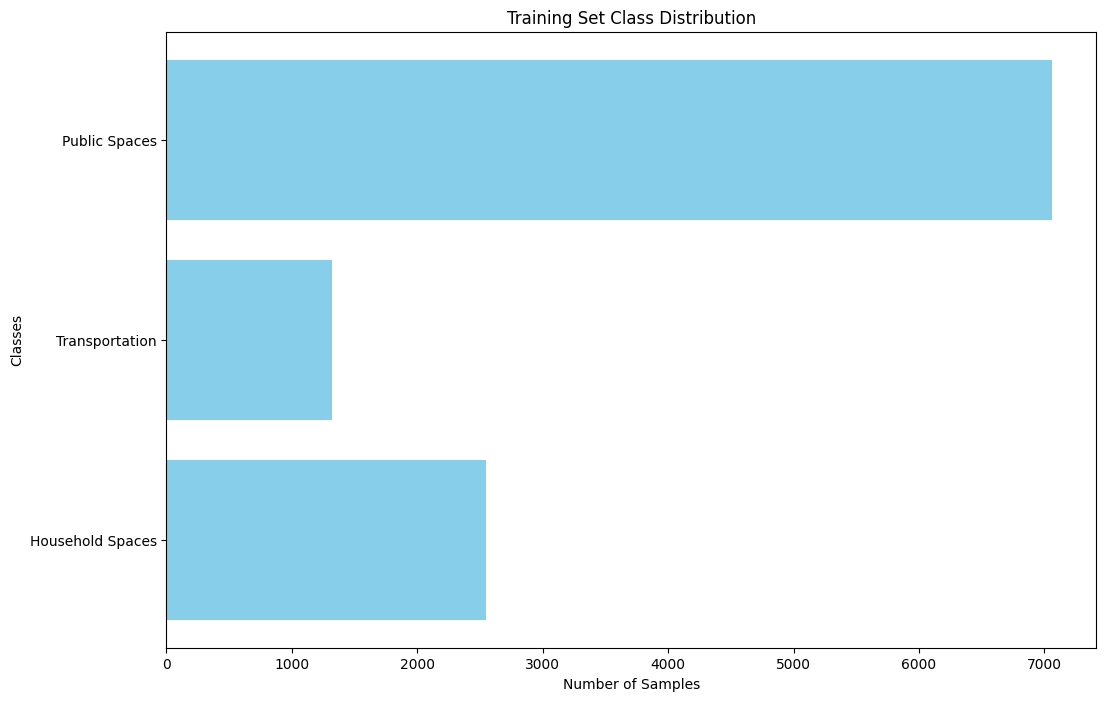

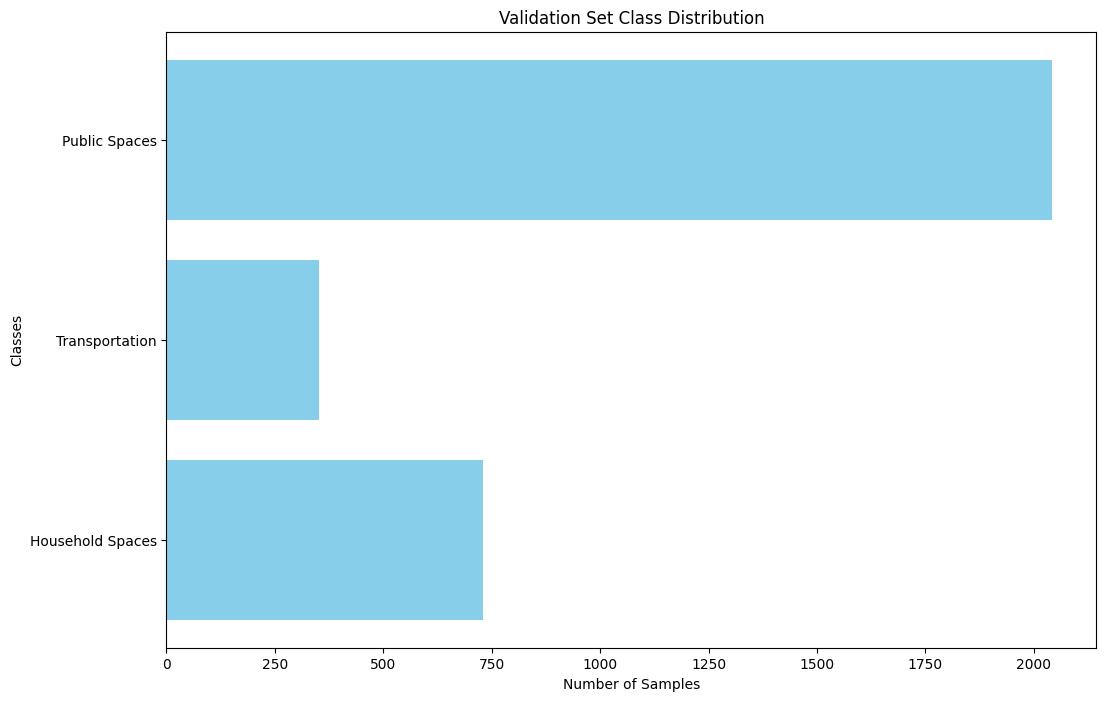

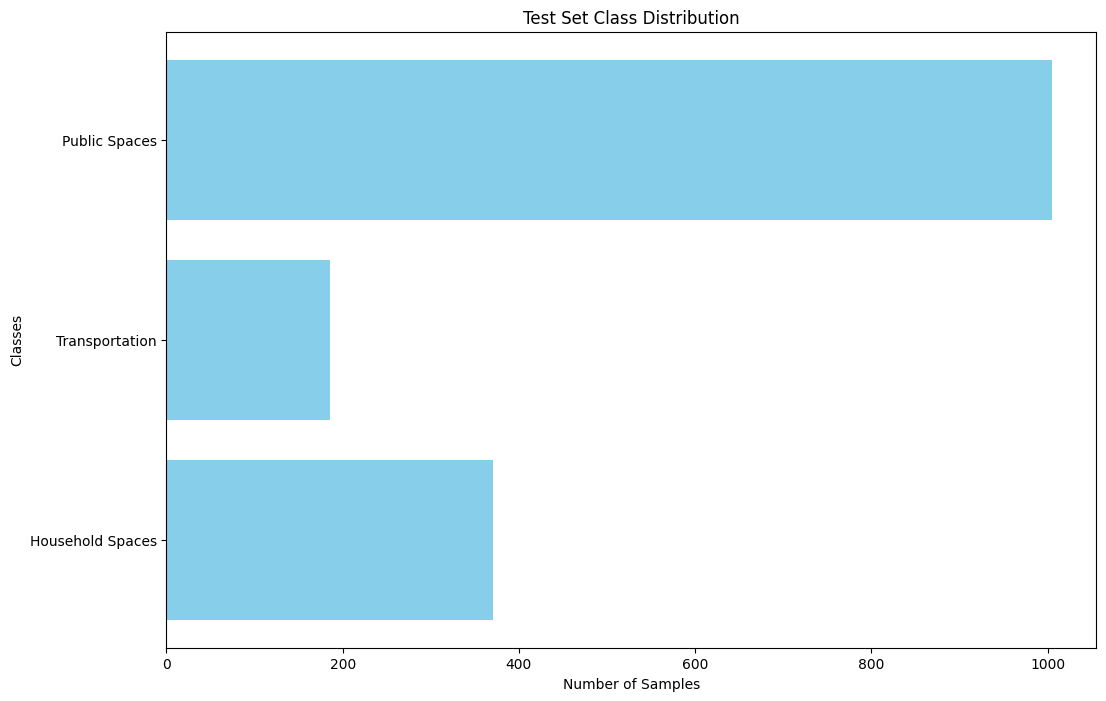

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random
from collections import Counter
import numpy as np

# Define the directory for the dataset
data_dir = 'Images'

# Define transformations with augmentation for increased dataset size
augmentation_transforms = transforms.Compose([
    transforms.RandomResizedCrop(128),  # Crop a random part of the image and resize to 128*128
    transforms.RandomHorizontalFlip(),   # Randomly flip the image horizontally
    transforms.RandomRotation(degrees=15),  # Randomly rotate the image by up to 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Adjust color
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
])

# Load the dataset with transformations
dataset = datasets.ImageFolder(data_dir, transform=augmentation_transforms)

# Define the mapping from original classes to new categories
class_mapping = {
    'bathroom': 'Household Spaces', 'bedroom': 'Household Spaces', 'children_room': 'Household Spaces',
    'closet': 'Household Spaces', 'corridor': 'Household Spaces', 'dining_room': 'Household Spaces',
    'garage': 'Household Spaces', 'kitchen': 'Household Spaces', 'livingroom': 'Household Spaces',
    'pantry': 'Household Spaces',

    'airport_inside': 'Transportation', 'inside_bus': 'Transportation', 'inside_subway': 'Transportation',
    'subway': 'Transportation', 'trainstation': 'Transportation',

    'computerroom': 'Public Spaces', 'laundromat': 'Public Spaces', 'bakery': 'Public Spaces',
    'bar': 'Public Spaces', 'bookstore': 'Public Spaces', 'buffet': 'Public Spaces', 'casino': 'Public Spaces',
    'church_inside': 'Public Spaces', 'cloister': 'Public Spaces', 'clothingstore': 'Public Spaces',
    'deli': 'Public Spaces', 'dentaloffice': 'Public Spaces', 'elevator': 'Public Spaces',
    'fastfood_restaurant': 'Public Spaces', 'florist': 'Public Spaces', 'grocerystore': 'Public Spaces',
    'gym': 'Public Spaces', 'hairsalon': 'Public Spaces', 'hospitalroom': 'Public Spaces',
    'jewelleryshop': 'Public Spaces', 'library': 'Public Spaces', 'mall': 'Public Spaces',
    'operating_room': 'Public Spaces', 'restaurant': 'Public Spaces', 'restaurant_kitchen': 'Public Spaces',
    'shoeshop': 'Public Spaces', 'stairscase': 'Public Spaces', 'studiomusic': 'Public Spaces',
    'toystore': 'Public Spaces', 'tv_studio': 'Public Spaces', 'videostore': 'Public Spaces',
    'waitingroom': 'Public Spaces', 'warehouse': 'Public Spaces', 'winecellar': 'Public Spaces',
    'prisoncell': 'Public Spaces', 'artstudio': 'Public Spaces', 'bowling': 'Public Spaces',
    'concert_hall': 'Public Spaces', 'gameroom': 'Public Spaces', 'greenhouse': 'Public Spaces',
    'kindergarden': 'Public Spaces', 'poolinside': 'Public Spaces', 'movietheater': 'Public Spaces',
    'museum': 'Public Spaces', 'nursery': 'Public Spaces', 'classroom': 'Public Spaces',
    'laboratorywet': 'Public Spaces', 'office': 'Public Spaces', 'meeting_room': 'Public Spaces',
    'auditorium': 'Public Spaces', 'locker_room': 'Public Spaces', 'lobby': 'Public Spaces'
}

# Create a custom dataset class to handle new categories
class CustomImageDataset(Dataset):
    def __init__(self, dataset, class_mapping):
        self.dataset = dataset
        self.class_mapping = class_mapping
        self.classes = list(set(class_mapping.values()))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, original_label = self.dataset[idx]
        new_label = self.class_to_idx[self.class_mapping[self.dataset.classes[original_label]]]
        return img, new_label

# Create a new dataset with the custom class
custom_dataset = CustomImageDataset(dataset, class_mapping)

# Split the dataset into training, validation, and test sets
dataset_len = len(custom_dataset)
train_ds, val_ds, test_ds = random_split(custom_dataset, [int(dataset_len * 0.7), int(dataset_len * 0.2), dataset_len - int(dataset_len * 0.9)])

# Create DataLoaders for each set
batch_size = 100  # Parameter
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=4)

# Print some information about the dataset
print(f'Number of training samples: {len(train_ds)}')
print(f'Number of validation samples: {len(val_ds)}')
print(f'Number of test samples: {len(test_ds)}')
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
print(f'New Classes: {custom_dataset.classes}')
print(f'Number of New Classes: {len(custom_dataset.classes)}')

# Function to denormalize the image
def denormalize(img_tensor):
    img_tensor = img_tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    img_tensor = img_tensor.clip(0, 1)
    return img_tensor

# Function to display an image and its label
def show_sample(img, label, classes):
    img = denormalize(img)
    print("Label:", classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

# Display a sample image from the dataset
img, label = custom_dataset[5]
show_sample(img, label, custom_dataset.classes)

# Display a grid of 16 random images from the dataset
plt.figure(figsize=(9, 9))
indices = random.sample(range(len(custom_dataset)), 16)
for i, idx in enumerate(indices):
    image, label = custom_dataset[idx]
    image = denormalize(image)
    ax = plt.subplot(4, 4, i + 1)
    image_np = image.permute(1, 2, 0).numpy()
    plt.imshow(image_np)
    plt.title(custom_dataset.classes[label])
    plt.axis('off')
plt.show()

# Count the occurrences of each new category in training, validation, and test datasets
def get_new_class_distribution(subset, dataset):
    count_dict = {category: 0 for category in dataset.classes}
    for i in range(len(subset)):
        _, label = subset[i]
        count_dict[dataset.classes[label]] += 1
    return count_dict

train_class_distribution = get_new_class_distribution(train_ds, custom_dataset)
val_class_distribution = get_new_class_distribution(val_ds, custom_dataset)
test_class_distribution = get_new_class_distribution(test_ds, custom_dataset)

# Plotting the class distributions
def plot_class_distribution(distribution, title):
    classes = list(distribution.keys())
    counts = list(distribution.values())

    plt.figure(figsize=(12, 8))
    plt.barh(classes, counts, color='skyblue')
    plt.xlabel('Number of Samples')
    plt.ylabel('Classes')
    plt.title(title)
    plt.show()

plot_class_distribution(train_class_distribution, 'Training Set Class Distribution')
plot_class_distribution(val_class_distribution, 'Validation Set Class Distribution')
plot_class_distribution(test_class_distribution, 'Test Set Class Distribution')


# Balancing dataset

Balancing the dataset helps to ensure that each class is equally represented in the training, validation, and test sets. This is important for several reasons:

Avoiding Bias: If some classes are overrepresented, the model may become biased towards these classes and perform poorly on underrepresented classes. Balancing helps the model learn to treat all classes with equal importance.

Improved Generalization: A balanced dataset helps the model generalize better to unseen data. It ensures that the model has sufficient examples from each class to learn the necessary features and patterns.

Reliable Evaluation: In a balanced test set, the performance metrics (such as accuracy, precision, recall) provide a more reliable and fair evaluation of the model. If the test set is imbalanced, these metrics might be skewed towards the majority classes.

In [ ]:
# Find the minimum number of samples per class
min_train_samples = min(train_class_distribution.values())
min_val_samples = min(val_class_distribution.values())
min_test_samples = min(test_class_distribution.values())

# Function to create a balanced subset
def create_balanced_subset(dataset, original_dataset, class_distribution, min_samples):
    indices_per_class = {category: [] for category in original_dataset.classes}

    for idx, (_, label) in enumerate(dataset):
        category = original_dataset.classes[label]
        if len(indices_per_class[category]) < min_samples:
            indices_per_class[category].append(idx)

    balanced_indices = []
    for indices in indices_per_class.values():
        balanced_indices.extend(indices)

    return torch.utils.data.Subset(dataset, balanced_indices)

# Create balanced training, validation, and test sets
balanced_train_ds = create_balanced_subset(train_ds, dataset, train_class_distribution, min_train_samples)
balanced_val_ds = create_balanced_subset(val_ds, dataset, val_class_distribution, min_val_samples)
balanced_test_ds = create_balanced_subset(test_ds, dataset, test_class_distribution, min_test_samples)

# Create DataLoaders for each set
batch_size = 100  # Parameter
train_loader = DataLoader(balanced_train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(balanced_val_ds, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(balanced_test_ds, batch_size=batch_size, shuffle=False, num_workers=4)

# Print some information about the balanced dataset
print(f'Number of balanced training samples: {len(balanced_train_ds)}')
print(f'Number of balanced validation samples: {len(balanced_val_ds)}')
print(f'Number of balanced test samples: {len(balanced_test_ds)}')
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
print(f'New Classes: {custom_dataset.classes}')
print(f'Number of New Classes: {len(custom_dataset.classes)}')


Number of balanced training samples: 3966
Number of balanced validation samples: 1053
Number of balanced test samples: 558
Shape of X [N, C, H, W]: torch.Size([100, 3, 128, 128])
Shape of y: torch.Size([100]) torch.int64
New Classes: ['Household Spaces', 'Transportation', 'Public Spaces']
Number of New Classes: 3


# CNN Model Training

It should be noted to calculate the output size of each layer, these formulas should be used:

•	Input image size: N x C x H x W #(100, 3, 128, 128)

•	Convolution with kernel size K, stride S, and padding P:

•	Output height: H_out = floor((H + 2P - K) / S) + 1

•	Output width: W_out = floor((W + 2P - K) / S) + 1

•	Max pooling with kernel size K, stride S:

•	Output height: H_out = floor((H - K) / S) + 1

•	Output width: W_out = floor((W - K) / S) + 1

For the first convolutional layer:
- Input image size: N x C x H x W = 100 x 3 x 128 x 128
- Convolution with kernel size K=3, stride S=1, and padding P=1
- Output height: H_out = floor((H + 2P - K) / S) + 1 = floor((128 + 2*1 - 3) / 1) + 1 = floor(128) = 128
- Output width: W_out = floor((W + 2P - K) / S) + 1 = floor((128 + 2*1 - 3) / 1) + 1 = floor(128) = 128
- The output size after the first max pooling layer (kernel size=2, stride=2) will be:
  - H_out = floor((H - K) / S) + 1 = floor((128 - 2) / 2) + 1 = floor(63) = 63
  - W_out = floor((W - K) / S) + 1 = floor((128 - 2) / 2) + 1 = floor(63) = 63

For the second convolutional layer:
- Input image size: N x C x H x W = 100 x 32 x 63 x 63 (output from the first max pooling)
- Convolution with kernel size K=3, stride S=1, and padding P=1
- Output height: H_out = floor((H + 2P - K) / S) + 1 = floor((63 + 2*1 - 3) / 1) + 1 = floor(63) = 63
- Output width: W_out = floor((W + 2P - K) / S) + 1 = floor((63 + 2*1 - 3) / 1) + 1 = floor(63) = 63
- The output size after the second max pooling layer (kernel size=2, stride=2) will be:
  - H_out = floor((H - K) / S) + 1 = floor((63 - 2) / 2) + 1 = floor(31.5) = 31
  - W_out = floor((W - K) / S) + 1 = floor((63 - 2) / 2) + 1 = floor(31.5) = 31

for final layer it is not correct, because we faced this RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x65536 and 61504x3) so we should choose 32.

For the fully connected layer (fc1):
- Input size: N x C = 100 x (64 * 32 * 32) = 100 x 65536 (output from the second max pooling)

So, the output size after the final max pooling layer will be [100, 64, 32, 32].

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):#Defines a Python subclass named CNN that inherits from nn.Module as a base class for all neural network modules.
#A model will have an __init__() function, where it instantiates its layers, and loads any data artifacts it might need (e.g., an NLP model might load a vocabulary).
    def __init__(self):
        super(CNN, self).__init__() #Call the constructor (__init__ method) of the parent class (nn.Module). Because of multiple inheritance, we use super(CNN, self) instead of super() for specifying the class explicitly. It is necessary for clarity and correctness.
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 *32 * 32, 3)
#A model will have a forward() function. This is where the actual computation happens: An input is passed through the network layers and various functions to generate an output.
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1) # Flatten the output (100,64,32,32)=>(100,64×32×32)=(100,65536)). view() is used to reshape tensors. The x.size(0) specifies the size of the first dimension, and -1 is a placeholder which tells PyTorch to infer the size of the second dimension based on the original tensor's total size and the specified size of the first dimension.
        x = self.fc1(x)
        return x

# Create an instance or object of the CNN model
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=3, bias=True)
)


In [ ]:
#compile the model
from torch import optim
loss_fn = nn.CrossEntropyLoss()
learning_rate=0.001 #Parameter
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)#default learning rate=0.001.

Before training the model, the evaluate_model should be defined and it will be applied to validation and test datasets.

In [ ]:
# Define the evaluation function
def evaluate_model(model, data_loader, loss_fn):
    model.eval()
    total_loss = 0.0
    correct_preds = 0
    total_samples = 0
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct_preds / total_samples
    return avg_loss, accuracy


In [ ]:
# Define the training function
def train_model(model, train_loader, val_loader, optimizer, loss_fn, num_epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_preds = 0
        total_samples = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        train_loss /= len(train_loader.dataset)
        train_accuracy = correct_preds / total_samples
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        val_loss, val_accuracy = evaluate_model(model, val_loader, loss_fn)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
# Train the model
num_epochs = 5 #Parameter
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, optimizer, loss_fn, num_epochs=num_epochs)

Epoch 1/5, Train Loss: 1.3844, Train Accuracy: 0.3839, Val Loss: 1.0927, Val Accuracy: 0.3741
Epoch 2/5, Train Loss: 1.0560, Train Accuracy: 0.4365, Val Loss: 1.0001, Val Accuracy: 0.4878
Epoch 3/5, Train Loss: 1.0292, Train Accuracy: 0.4712, Val Loss: 0.9946, Val Accuracy: 0.4887
Epoch 4/5, Train Loss: 1.0056, Train Accuracy: 0.4795, Val Loss: 0.9762, Val Accuracy: 0.5304
Epoch 5/5, Train Loss: 0.9898, Train Accuracy: 0.5060, Val Loss: 0.9578, Val Accuracy: 0.5260


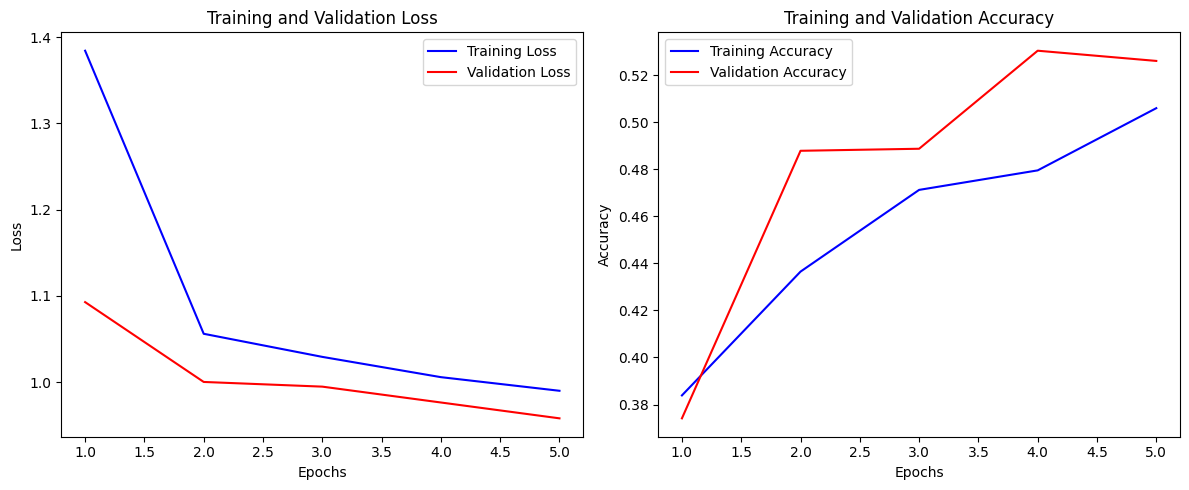

In [ ]:
import matplotlib.pyplot as plt
# Plot the results
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = evaluate_model(model, test_loader, loss_fn)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.9577, Test Accuracy: 0.5326


# Fine-Tuning

Batch Size: The number of training examples used in one iteration of gradient descent.

Number of Kernels: The number of convolutional kernels (filters) applied in each convolutional layer.

Learning Rate: The rate at which the model parameters are updated during optimization (e.g., SGD, Adam).

Number of Epochs: The number of times the entire dataset is passed forward and backward through the network during training.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Hyperparameters to tune
batch_sizes = [100]
num_kernels = [16, 24]
learning_rates = [0.001]
epochs_list = [3]

# Define the CNN model
class CNN(nn.Module):#Defines a Python subclass named CNN that inherits from nn.Module as a base class for all neural network modules.
#A model will have an __init__() function, where it instantiates its layers, and loads any data artifacts it might need (e.g., an NLP model might load a vocabulary).
    def __init__(self, num_kernel):
        super(CNN, self).__init__() #Call the constructor (__init__ method) of the parent class (nn.Module). Because of multiple inheritance, we use super(CNN, self) instead of super() for specifying the class explicitly. It is necessary for clarity and correctness.
        self.conv1 = nn.Conv2d(3, num_kernel, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(num_kernel, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 *32 * 32, 3)
#A model will have a forward() function. This is where the actual computation happens: An input is passed through the network layers and various functions to generate an output.
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        return x

Learning Rate: 0.001, Kernel Size: 16, Batch Size: 100, Epochs: 3
Epoch 1/3, Train Loss: 1.7835, Train Accuracy: 0.3487, Val Loss: 1.0867, Val Accuracy: 0.3694
Epoch 2/3, Train Loss: 1.0621, Train Accuracy: 0.4112, Val Loss: 1.0220, Val Accuracy: 0.4653
Epoch 3/3, Train Loss: 1.0164, Train Accuracy: 0.4647, Val Loss: 0.9929, Val Accuracy: 0.4967
average validation accuracy: 0.4438113327002216
Learning Rate: 0.001, Kernel Size: 24, Batch Size: 100, Epochs: 3
Epoch 1/3, Train Loss: 1.3478, Train Accuracy: 0.3691, Val Loss: 1.0720, Val Accuracy: 0.4150
Epoch 2/3, Train Loss: 1.0446, Train Accuracy: 0.4402, Val Loss: 1.0077, Val Accuracy: 0.5280
Epoch 3/3, Train Loss: 1.0040, Train Accuracy: 0.4894, Val Loss: 0.9925, Val Accuracy: 0.4995
average validation accuracy: 0.4808483697372586
Best Hyperparameters:
{'Learning Rate': 0.001, 'Num kernel': 24, 'Batch Size': 100, 'Epochs': 3}
Epoch 1/3, Train Loss: 1.5137, Train Accuracy: 0.3517, Val Loss: 1.0900, Val Accuracy: 0.3761
Epoch 2/3, Train 

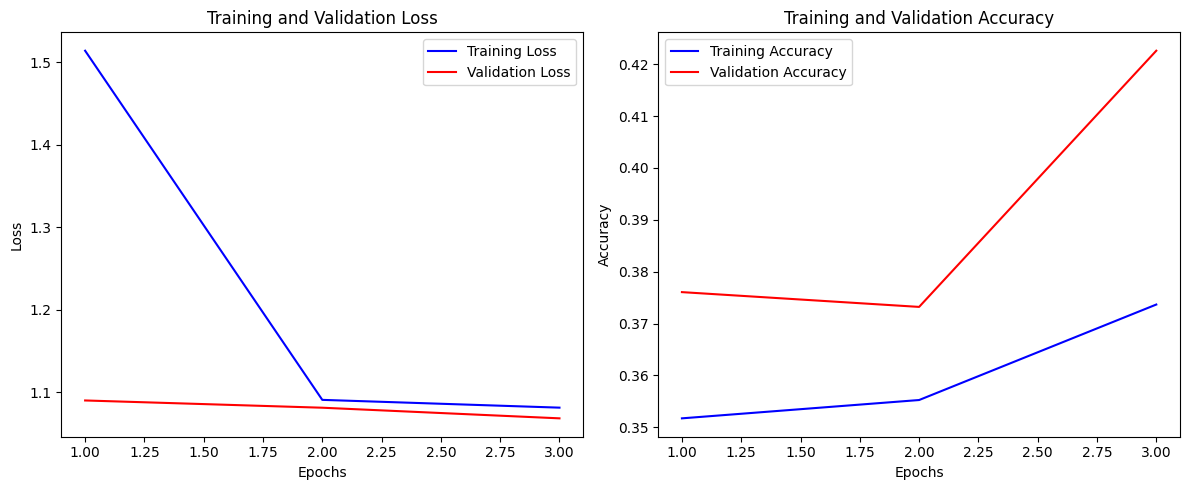

Test Loss: 1.0722, Test Accuracy: 0.3889


In [ ]:
best_validation_accuracy = 0.0  # Initialize best validation accuracy
best_hyperparameters = {}

# Perform cross-validation
for batch_size in batch_sizes:
    for num_kernel in num_kernels:
        for lr in learning_rates:
            for epochs in epochs_list:
                print(f"Learning Rate: {lr}, Kernel Size: {num_kernel}, Batch Size: {batch_size}, Epochs: {epochs}")

                train_loader = DataLoader(balanced_train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
                val_loader = DataLoader(balanced_val_ds, batch_size=batch_size, shuffle=False, num_workers=4)
                test_loader = DataLoader(balanced_test_ds, batch_size=batch_size, shuffle=False, num_workers=4)

                model = CNN(num_kernel=num_kernel)
                loss_fn = nn.CrossEntropyLoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)

                train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, optimizer, loss_fn, num_epochs=epochs)
                avg_validation_accuracy = sum(val_accuracies) / epochs

                print(f"average validation accuracy: {avg_validation_accuracy}")

            # Update best hyperparameters if the current configuration has higher validation accuracy
                if avg_validation_accuracy > best_validation_accuracy:
                    best_validation_accuracy = avg_validation_accuracy
                    best_hyperparameters = {
                        'Learning Rate': lr,
                        'Num kernel': num_kernel,
                        'Batch Size': batch_size,
                        'Epochs': epochs
                    }

print("Best Hyperparameters:")
print(best_hyperparameters)

# Train the best model
train_loader = DataLoader(balanced_train_ds, batch_size=best_hyperparameters['Batch Size'], shuffle=True, num_workers=4)
val_loader = DataLoader(balanced_val_ds, batch_size=best_hyperparameters['Batch Size'], shuffle=False, num_workers=4)
test_loader = DataLoader(balanced_test_ds, batch_size=best_hyperparameters['Batch Size'], shuffle=False, num_workers=4)
best_model = CNN(num_kernel=best_hyperparameters['Num kernel'])
best_optimizer = torch.optim.Adam(best_model.parameters(), lr=best_hyperparameters['Learning Rate'])
best_train_losses, best_val_losses, best_train_accuracies, best_val_accuracies = train_model(best_model, train_loader, val_loader, best_optimizer, loss_fn, num_epochs=best_hyperparameters['Epochs'])

import matplotlib.pyplot as plt
# Plot the results
epochs = range(1, best_hyperparameters['Epochs'] + 1)

plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, best_train_losses, 'b', label='Training Loss')
plt.plot(epochs, best_val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, best_train_accuracies, 'b', label='Training Accuracy')
plt.plot(epochs, best_val_accuracies, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the best model on the test set
test_loss, test_accuracy = evaluate_model(best_model, test_loader, loss_fn)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')